In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import unique
from pandas import Series,DataFrame
import copy
%matplotlib inline

In [2]:
## Load in the original Data
data = pd.io.stata.read_stata('ca_indresp_w_POLS0010.dta')
data.to_csv('changed_to_csv.csv')

In [3]:
data.head()

,pidp,psu,strata,birthy,racel_dv,bornuk_dv,ca_age,ca_sex,ca_couple,ca_hhcompa,...,ca_sempgovt,ca_keyworker,ca_wah,ca_timechcare,ca_auditc1_cv,ca_auditc3_cv,ca_smoker,ca_scghq1_dv,ca_gor_dv,ca_betaindin_xw
0,76165,19,6,1982,british/english/scottish/welsh/northern irish ...,born in uk,37,Female,Yes,2+,...,Inapplicable,No,Always,20,No,Inapplicable,No,12,West Midlands,0.000000
1,280165,67,15,1979,british/english/scottish/welsh/northern irish ...,born in uk,40,Female,Yes,0,...,Inapplicable,No,Never,10,Yes,2-3 times per week,No,6,South East,0.537904
2,469205,106,25,1990,british/english/scottish/welsh/northern irish ...,born in uk,30,Female,No,2+,...,Inapplicable,Yes,Never,90,Yes,2-4 times in total,No,18,East Midlands,0.000000
3,599765,130,33,1986,british/english/scottish/welsh/northern irish ...,born in uk,33,Female,Yes,0,...,Inapplicable,Yes,Always,Inapplicable,No,Inapplicable,No,7,West Midlands,0.322060
4,732365,157,43,1985,british/english/scottish/welsh/northern irish ...,born in uk,34,Male,No,0,...,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,Yes,22,North West,2.375521


In [4]:
data.tail()

,pidp,psu,strata,birthy,racel_dv,bornuk_dv,ca_age,ca_sex,ca_couple,ca_hhcompa,...,ca_sempgovt,ca_keyworker,ca_wah,ca_timechcare,ca_auditc1_cv,ca_auditc3_cv,ca_smoker,ca_scghq1_dv,ca_gor_dv,ca_betaindin_xw
17447,1653059650,52172,5123,1956,indian (asian or asian british),not born in uk,63,Male,Yes,0,...,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Yes,2-3 times per week,No,10,London,0.014301
17448,1653059690,52172,5123,1963,indian (asian or asian british),not born in uk,56,Female,Yes,0,...,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Missing,London,0.000000
17449,1653134450,52172,5123,1973,indian (asian or asian british),not born in uk,46,Female,Yes,0,...,Inapplicable,Inapplicable,Inapplicable,0,No,Inapplicable,No,3,London,0.000000
17450,1653134490,52172,5123,1969,indian (asian or asian british),not born in uk,50,Male,Yes,0,...,Inapplicable,No,Always,Refusal,Yes,Once,No,Missing,London,0.000000
17451,1653134570,52172,5123,2002,missing,not born in uk,17,Female,No,0,...,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No,7,London,0.000000


In [5]:
#convert each columns datatype as float
data['strata'] = data['strata'].cat.codes
data['strata'] = data['strata'].astype(float)

In [6]:
data['psu'] = data['psu'].cat.codes
data['psu'] = data['psu'].astype(float)

In [7]:
data['birthy'] = data['birthy'].cat.codes
data['birthy'] = data['birthy'].astype(float)

In [8]:
data['ca_age'] = data['ca_age'].cat.codes
data['ca_age'] = data['ca_age'].astype(float)

In [9]:
data['ca_timechcare'] = data['ca_timechcare'].cat.codes
data['ca_timechcare'] = data['ca_timechcare'].astype(float)

In [10]:
data['ca_betaindin_xw'] = data['ca_betaindin_xw'].cat.codes
data['ca_betaindin_xw'] = data['ca_betaindin_xw'].astype(float)

In [11]:
data['pidp'] = data['pidp'].astype(float)

In [12]:
## Examine the columns, look at missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 17451
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pidp             17452 non-null  float64 
 1   psu              17452 non-null  float64 
 2   strata           17452 non-null  float64 
 3   birthy           17452 non-null  float64 
 4   racel_dv         17452 non-null  category
 5   bornuk_dv        17452 non-null  category
 6   ca_age           17452 non-null  float64 
 7   ca_sex           17452 non-null  category
 8   ca_couple        17452 non-null  category
 9   ca_hhcompa       17452 non-null  category
 10  ca_hhcompb       17452 non-null  category
 11  ca_hhcompc       17452 non-null  category
 12  ca_hadsymp       17452 non-null  category
 13  ca_tested        17452 non-null  category
 14  ca_testresult    17452 non-null  category
 15  ca_hcond_cv96    17452 non-null  category
 16  ca_sclonely_cv   17452 non-null  categor

In [13]:
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())

False


In [14]:
data.describe()

,pidp,psu,strata,birthy,ca_age,ca_timechcare,ca_betaindin_xw
count,1.745200e+04,17452.000000,17452.000000,17452.000000,17452.000000,17452.000000,17452.000000
mean,7.759816e+08,1708.057587,720.789136,48.767820,34.526645,6.656601,5410.724845
std,4.668566e+08,1150.783989,542.268350,17.056687,17.028230,14.092296,4504.532076
min,7.616500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.611235e+08,754.750000,190.000000,35.000000,22.000000,1.000000,654.750000
50%,7.480813e+08,1645.000000,668.000000,48.000000,36.000000,1.000000,5017.500000
75%,1.157189e+09,2554.000000,1160.000000,61.000000,48.000000,4.000000,9378.250000
max,1.653135e+09,4165.000000,1779.000000,84.000000,80.000000,92.000000,13715.000000


In [15]:
#To visualize

Text(0, 0.5, 'time spent on children')

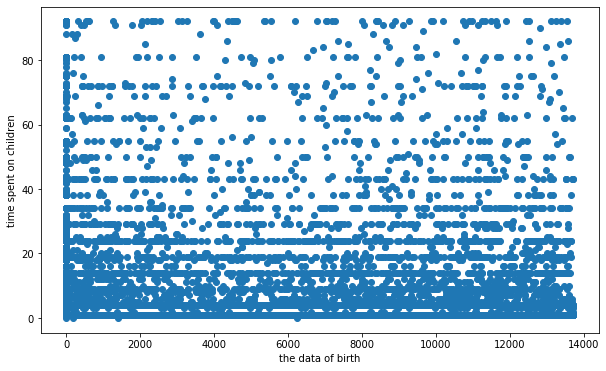

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(data.ca_betaindin_xw , data.ca_timechcare)
plt.xlabel('the data of birth')
plt.ylabel('time spent on children')

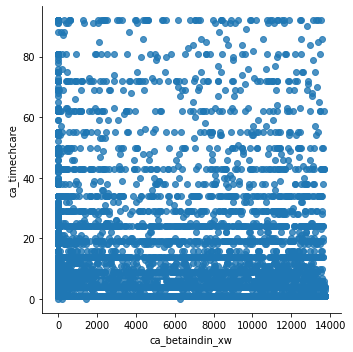

In [17]:
sns.lmplot('ca_betaindin_xw','ca_timechcare', data = data)

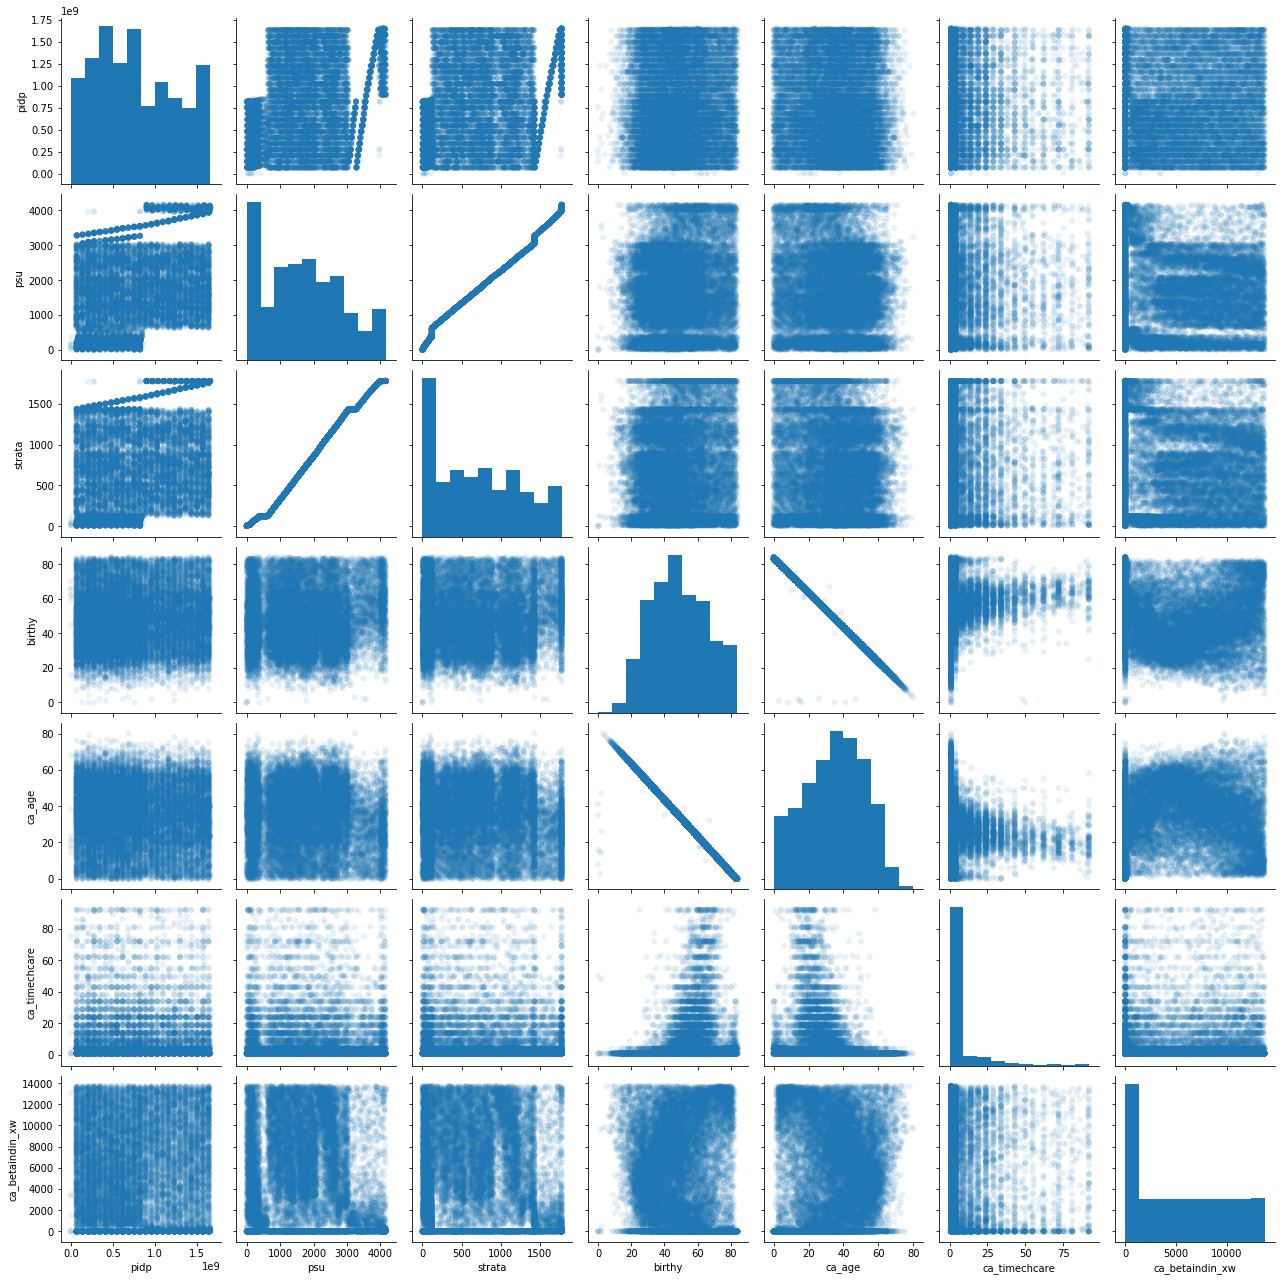

In [18]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

In [19]:
 X = data[['ca_betaindin_xw', 'pidp', 'ca_age', 'psu', 'birthy','strata']]

In [20]:
y = data['ca_timechcare']

In [21]:
X.shape

(17452, 6)

In [22]:
y.shape

(17452,)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#training,testing 70% traing 30% testing

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,y , test_size = 0.3 ,random_state =7  )

In [26]:
print (x_train.shape , y_train.shape)

(12216, 6) (12216,)


In [27]:
print (x_test.shape)

(5236, 6)


In [28]:
print (y_test.shape)

(5236,)


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Name the model
model = LinearRegression()

In [31]:
model.fit( x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
prediction = model.predict(x_test)

In [33]:
data.head()

,pidp,psu,strata,birthy,racel_dv,bornuk_dv,ca_age,ca_sex,ca_couple,ca_hhcompa,...,ca_sempgovt,ca_keyworker,ca_wah,ca_timechcare,ca_auditc1_cv,ca_auditc3_cv,ca_smoker,ca_scghq1_dv,ca_gor_dv,ca_betaindin_xw
0,76165.0,19.0,6.0,62.0,british/english/scottish/welsh/northern irish ...,born in uk,21.0,Female,Yes,2+,...,Inapplicable,No,Always,24.0,No,Inapplicable,No,12,West Midlands,0.0
1,280165.0,67.0,15.0,59.0,british/english/scottish/welsh/northern irish ...,born in uk,24.0,Female,Yes,0,...,Inapplicable,No,Never,14.0,Yes,2-3 times per week,No,6,South East,3535.0
2,469205.0,106.0,25.0,70.0,british/english/scottish/welsh/northern irish ...,born in uk,14.0,Female,No,2+,...,Inapplicable,Yes,Never,75.0,Yes,2-4 times in total,No,18,East Midlands,0.0
3,599765.0,130.0,33.0,66.0,british/english/scottish/welsh/northern irish ...,born in uk,17.0,Female,Yes,0,...,Inapplicable,Yes,Always,1.0,No,Inapplicable,No,7,West Midlands,1523.0
4,732365.0,156.0,43.0,65.0,british/english/scottish/welsh/northern irish ...,born in uk,18.0,Male,No,0,...,Inapplicable,Inapplicable,Inapplicable,1.0,No,Inapplicable,Yes,22,North West,13042.0


In [34]:
data1 = data[data['pidp'] == 732365.0]
data1

,pidp,psu,strata,birthy,racel_dv,bornuk_dv,ca_age,ca_sex,ca_couple,ca_hhcompa,...,ca_sempgovt,ca_keyworker,ca_wah,ca_timechcare,ca_auditc1_cv,ca_auditc3_cv,ca_smoker,ca_scghq1_dv,ca_gor_dv,ca_betaindin_xw
4,732365.0,156.0,43.0,65.0,british/english/scottish/welsh/northern irish ...,born in uk,18.0,Male,No,0,...,Inapplicable,Inapplicable,Inapplicable,1.0,No,Inapplicable,Yes,22,North West,13042.0


In [35]:
data1['ca_timechcare']

4    1.0
Name: ca_timechcare, dtype: float64

In [36]:
prediction[4]

3.4973449925191495

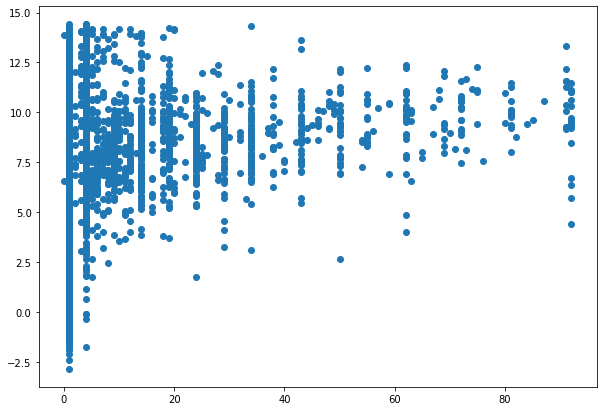

In [37]:
plt.figure(figsize = (10,7))
plt.scatter(y_test, prediction)

In [38]:
#calling coefficient of the features
model.coef_

array([-5.54802982e-05, -2.76941804e-10, -1.95662133e-01,  1.99303823e-03,
        1.10358162e-02, -4.07490728e-03])

In [39]:
#Dframe_coefficient = pd.DataFrame(model.coef_, X.columns, columns = ['coeffic value'])

In [40]:
model.intercept_

12.900109174842882

In [41]:
# To find the root mean square error RMSE
from sklearn import metrics


In [42]:
mean_square = metrics.mean_squared_error(y_test , prediction)

In [43]:
RMSE = np.sqrt(mean_square)

In [44]:
RMSE

13.596511333263933

In [45]:
# Building another model with fewer features
X = data[['ca_betaindin_xw', 'pidp', 'birthy','strata']]
y = data['ca_timechcare']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X,y , test_size = 0.3 ,random_state =7  )

In [47]:
model2 = LinearRegression()

In [48]:
model2.fit( x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
prediction2 = model2.predict(x_test)

In [50]:
# second prediction
prediction2[4] 

3.339706974049488

In [51]:
# First prediction
prediction[4]

3.4973449925191495

In [52]:
data1['ca_timechcare']

4    1.0
Name: ca_timechcare, dtype: float64

In [53]:
mean_square2 = metrics.mean_squared_error(y_test , prediction2)

In [54]:
RMSE2 = np.sqrt(mean_square2)

In [55]:
# comparing both root mean squre errors 
RMSE2

13.602990042091893

In [56]:
RMSE

13.596511333263933